In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq

In [21]:
# read training and test dataset
df_training = pd.read_csv('../data/data.csv', sep=',', index_col='CustomerId', na_values='#N/D')

# display the first few rows of the training dataset
df_training.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,,
15634602,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
# Analizar todas las columnas
for column in df_training.columns:
  print(f"Column name: {column}")
  print(f"Data type: {df_training[column].dtype}")
  print(f"Number of unique values: {df_training[column].nunique()}")
  print(f"Number of missing values: {df_training[column].isnull().sum()}")
  print(f"Sample values: {df_training[column].head(3)}")
  print("-" * 60)

Column name: CreditScore
Data type: int64
Number of unique values: 460
Number of missing values: 0
Sample values: CustomerId
15634602    619
15647311    608
15619304    502
Name: CreditScore, dtype: int64
------------------------------------------------------------
Column name: Geography
Data type: object
Number of unique values: 3
Number of missing values: 0
Sample values: CustomerId
15634602    France
15647311     Spain
15619304    France
Name: Geography, dtype: object
------------------------------------------------------------
Column name: Gender
Data type: object
Number of unique values: 2
Number of missing values: 0
Sample values: CustomerId
15634602    Female
15647311    Female
15619304    Female
Name: Gender, dtype: object
------------------------------------------------------------
Column name: Age
Data type: int64
Number of unique values: 70
Number of missing values: 0
Sample values: CustomerId
15634602    42
15647311    41
15619304    42
Name: Age, dtype: int64
-------------

### Conclusiones:
1.- Se Elimina las columnas que no aportan Informacion para el estudio: Surname, RowNumber

In [24]:
df_training.drop(columns = ['Surname', 'RowNumber'], inplace = True)
#df_test.drop(columns = ['Age','Years_employed'], inplace = True)

KeyError: "['Surname', 'RowNumber'] not found in axis"

In [25]:
#Realizamos un análisis de nulos para validar si existen datos faltantes
df_training.isna().sum().sort_values(ascending = False)

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Conclusion: Todo bien. No existen datos nulos.

In [26]:
#Función de variables categóricas
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

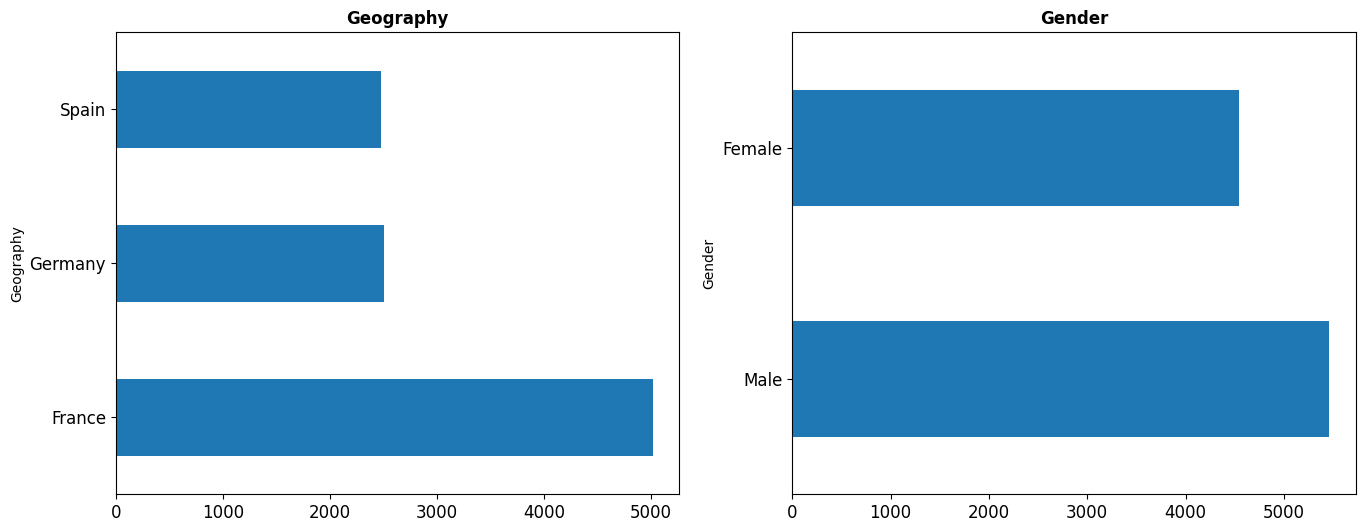

In [27]:
#Ejecutamos la función de variables categóricas.
graficos_eda_categoricos(df_training.select_dtypes('O'))

In [28]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [32]:
estadisticos_cont(df_training.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,652.000,96.653299,350.00,584.00,652.000,718.0000,850.00
Geography,10000.0,0.746300,0.000,0.827529,0.00,0.00,0.000,1.0000,2.00
Gender,10000.0,0.545700,1.000,0.497932,0.00,0.00,1.000,1.0000,1.00
Age,10000.0,38.921800,37.000,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,5.000,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,97198.540,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,1.000,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,1.000,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,1.000,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,100193.915,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


### Conclusión: Basado en la descripción estadística no se observa ninguna columna obviamente irrelevante.

In [33]:
from sklearn.preprocessing import LabelEncoder

## Transformar *Geography* y *Gender* a numericas

In [30]:
categorical_columns = ['Geography', 'Gender']
le = LabelEncoder()

# Aplica Label Encoding a cada columna categórica
for col in categorical_columns:
    df_training[col] = le.fit_transform(df_training[col])
    

In [31]:
estadisticos_cont(df_training.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,652.000,96.653299,350.00,584.00,652.000,718.0000,850.00
Geography,10000.0,0.746300,0.000,0.827529,0.00,0.00,0.000,1.0000,2.00
Gender,10000.0,0.545700,1.000,0.497932,0.00,0.00,1.000,1.0000,1.00
Age,10000.0,38.921800,37.000,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,5.000,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,97198.540,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,1.000,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,1.000,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,1.000,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,100193.915,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


In [34]:
# convert data to table
table_training = pa.Table.from_pandas(df_training)
#table_test = pa.Table.from_pandas(df_test)

In [35]:
# write tables out to parquet
pq.write_table(table_training, "../data/train-data/data.parquet", version="1.0")
# pq.write_table(table_test, "../data/test-data/data-test.parquet", version="1.0")